In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data
data = pd.read_csv('/Users/pavansingh/Desktop/all_revs_1.csv')
data.shape
data


/var/folders/y5/7wlh6jzj03185p7x7ggqb_280000gn/T/ipykernel_33175/2736403722.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/pavansingh/Desktop/all_revs_1.csv')


,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,category,vote,image
0,0,5.0,True,"03 17, 2016",A34SO74JEYQXZW,B0012Y0ZG2,{'Size:': ' 39'},Jose,Sally's stop selling this great shampoo for fu...,Fuller Hair,1458172800,beauty,NaN,NaN
1,1,5.0,True,"03 13, 2014",A2TZW7B0YG2ZJQ,B0009RF9DW,{'Size:': ' 258'},flavio sanchez,i am ok with this adidas hair and body 3 activ...,i love it,1394668800,beauty,NaN,NaN
2,2,5.0,True,"10 26, 2013",A4DEEDXZK8L78,B000URXP6E,{'Size:': ' 205'},Gloria Karimi,This is a beautiful scented lotion. Very mois...,Beautiful Scent,1382745600,beauty,NaN,NaN
3,3,5.0,True,"12 15, 2017",A1X15KWJ11IC1P,B0012Y0ZG2,{'Size:': ' 144'},Mert Ozer,"Lovely product and works great, except the art...",Five Stars,1513296000,beauty,NaN,NaN
4,4,5.0,True,"02 7, 2014",A3RGQCA2GSFLX2,B000URXP6E,{'Size:': ' 169'},self,hard to find a lab coat the fits nice. this o...,Love the fit of the lab coat......,1391731200,beauty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171241,9031018,5.0,False,"10 1, 2016",A28CR7BR4LGT0W,B0006Z7NN6,NaN,Kraal,Like product as we have been using braggs ami...,Like product as we have been using braggs amin...,1475280000,grocery_and_gourmet_food,NaN,NaN
9171242,9031019,4.0,False,"10 9, 2015",A2MNB77YGJ3CN0,B000GW241K,"{'Size:': ' 2.6 Ounce ( Pack of 4)', 'Flavor:'...",L. Mountford,I've been a fan of Jack Link's products for a ...,"Tasty hit of protein, but a bit salty",1444348800,grocery_and_gourmet_food,NaN,NaN
9171243,9031020,5.0,False,"03 20, 2016",A22RZG1NQ0WAUX,B01AK44MOK,"{'Size:': ' 6 Pouches', 'Flavor:': ' Sweet Pot...",K. L. Burchett,Tasty. Almost as thick as sweet potato fluff. ...,Tasty,1458432000,grocery_and_gourmet_food,8.0,NaN
9171244,9031021,3.0,True,"01 5, 2015",A14NSDI5HZX9G5,B00FFFTIP8,NaN,ret.Pet Pro,Not what I was looking to receive. I was tryin...,Great Northern Popcorn 5 Pounds Bulk GNP...,1420416000,grocery_and_gourmet_food,NaN,NaN


In [ ]:
## If We Wanted to Binarise the Results
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)

If predicted rating is greater than or equal to 3.5, then 1, else 0

Predicted Ratings: [5.   4.03 4.4  4.4  5.   5.   4.35 4.35 4.59 4.59 5.   5.   4.83 4.83
 4.5  5.   3.79 3.79 3.9  3.9  4.89 4.89 4.26 4.26 4.03 4.03 4.37 4.37
 4.26 4.26 4.95 4.95 4.52 4.52 5.   5.   4.45 4.45 4.9  4.9  4.91 4.91
 4.53 4.53 4.72 4.72 4.3  4.3  4.85 4.85 3.89 3.89 4.17 4.17 4.15 4.15
 4.   4.   4.42 4.42 2.94 2.94 3.7  3.7  4.5  4.5  4.21 4.21 4.76 4.76
 4.28 4.28 4.07 4.07 4.05 4.05 4.59 4.59 3.95 3.95 4.66 4.66 4.17 4.17
 4.   4.   4.68 4.68 4.61 4.61 4.52 4.52 3.72 3.72 4.81 4.81 4.28 4.28
 4.24 4.24 4.11 4.11 4.07 4.07 4.71 4.71 4.55 4.55 4.8  4.8  4.87 4.87
 4.89 4.89 4.5  4.5  4.4  4.4  4.16 4.16 4.72 4.72 4.38 4.38 4.67 4.67
 4.37 4.37 4.   3.85 5.   5.   4.37 4.37 4.18 4.18 4.42 4.42 3.72 3.72
 4.59 4.59 4.92 4.92 4.15 4.15 4.83 4.83 4.63 4.63 4.39 4.39 4.06 4.06
 4.62 4.62 4.41 4.41 4.52 4.52 4.56 4.56 4.83 4.83 4.12 4.12 3.8  3.8
 3.89 3.89 4.12 4.12 4.44 4.44 4.39 4.39 4.22 4.22 4.21 4.21 

In [ ]:
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Using sklearn
Accuracy: 0.8603491271820449
Precision: 0.8727034120734908
Recall: 0.9779411764705882
F1 Score: 0.9223300970873787


Manually
Accuracy: 0.8603491271820449
Precision: 0.8727034120734908
Recall: 0.9779411764705882
F1 Score: 0.9223300970873787


In [ ]:
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)

In [ ]:
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
# matrix factorization using stochastic gradient descent
def matrix_factorization_sgd(R, K, steps=500, alpha=0.001, beta=0.02, overfitting=True, bias=True):
    # R = user-item ratings matrix
    # K = number of latent features
    # steps = number of iterations
    # alpha = learning rate
    # beta = regularization parameter

    # Initialize user and item latent feature matrices
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    Q = Q.T
    
    # apply stochastic gradient descent to update P and Q
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P, Q)
        e = 0
        # apply regularization to prevent overfitting
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        # set threshold for error rate
        if e < 0.001:
            break
    return P, Q.T

# apply matrix factorization using stochastic gradient descent
nP, nQ = matrix_factorization_sgd(R=x_hidden.values, K=2)
nR = np.dot(nP, nQ.T)

# view reconstructed matrix
print("Reconstructed Matrix")
nR = pd.DataFrame(nR, index=x_hidden.index, columns=x_hidden.columns)
nR

***
# Sandbox

Here we will test out the workings of item based collaborative filtering. The steps are as follows:

1. Have User Item matrix
2. Hide some ratings to simulate a test set
3. Calculate similarity (cosine similarity)
4. Calculate weighted average of ratings
5. Fill in missing values with predicted ratings
6. Take the predicted ratings and compare them to the hidden ratings
7. Calculate MAE, RMSE, MSE
8. Binarise the ratings 
9. Calculate classification metrics


In [ ]:
%reset -f

# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
x = pd.read_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data.csv", index_col=0)
x

,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,0,0,2,5,4,3,4,4,4,4
user2,4,0,3,5,0,0,0,0,0,4
user3,0,3,4,4,0,2,0,0,0,0
user4,0,0,3,5,4,0,0,0,0,0
user5,3,4,0,4,4,0,5,5,5,5
user6,4,5,0,0,0,0,4,2,2,0
user7,2,2,0,0,0,0,5,3,3,3
user8,0,5,4,0,4,3,0,0,0,0
user9,0,5,4,0,5,2,0,2,2,0
user10,0,0,0,0,5,0,4,4,4,4


In [ ]:
# create a copy of the original matrix to store hidden ratings
x_hidden = x.copy()
indices_tracker = []

# identifies rated books and randomly selects 2 books to hide ratings for each user
np.random.seed(10)  # You can use any integer value as the seed
for user_id in range(x_hidden.shape[0]):
    rated_books = np.where(x_hidden.iloc[user_id, :] > 0)[0]
    print("User:", user_id)
    print("Indices of Rated Books:", rated_books)
    hidden_indices = np.random.choice(rated_books, min(2, len(rated_books)), replace=False)
    indices_tracker.append(hidden_indices)
    print("Indices to Hide:", hidden_indices, "\n")
    x_hidden.iloc[user_id, hidden_indices] = 0


User: 0
Indices of Rated Books: [2 3 4 5 6 7 8 9]
Indices to Hide: [4 5] 

User: 1
Indices of Rated Books: [0 2 3 9]
Indices to Hide: [3 9] 

User: 2
Indices of Rated Books: [1 2 3 5]
Indices to Hide: [5 1] 

User: 3
Indices of Rated Books: [2 3 4]
Indices to Hide: [4 2] 

User: 4
Indices of Rated Books: [0 1 3 4 6 7 8 9]
Indices to Hide: [9 1] 

User: 5
Indices of Rated Books: [0 1 6 7 8]
Indices to Hide: [8 1] 

User: 6
Indices of Rated Books: [0 1 6 7 8 9]
Indices to Hide: [8 9] 

User: 7
Indices of Rated Books: [1 2 4 5]
Indices to Hide: [1 5] 

User: 8
Indices of Rated Books: [1 2 4 5 7 8]
Indices to Hide: [1 7] 

User: 9
Indices of Rated Books: [4 6 7 8 9]
Indices to Hide: [6 4] 

User: 10
Indices of Rated Books: [0 1 2 4 6 7 8]
Indices to Hide: [2 0] 

User: 11
Indices of Rated Books: [0 1 2 4 5 6 7 8]
Indices to Hide: [1 7] 



In [ ]:
# check tracker - all hidden ratings 
indices_tracker = pd.DataFrame(indices_tracker).to_numpy()
print("Indices of Ratings per user \n", indices_tracker)

# flattened
indices_tracker_flat = indices_tracker.flatten()
print("Indices of Ratings per User joined", indices_tracker_flat)


Indices of Ratings per user 
 [[4 5]
 [3 9]
 [5 1]
 [4 2]
 [9 1]
 [8 1]
 [8 9]
 [1 5]
 [1 7]
 [6 4]
 [2 0]
 [1 7]]
Indices of Ratings per User joined [4 5 3 9 5 1 4 2 9 1 8 1 8 9 1 5 1 7 6 4 2 0 1 7]


In [ ]:
# see updated matrix with hidden ratings
print("Updated Matrix with Hidden Ratings")
display(x_hidden)

# see original matrix
print("Original Matrix")
display(x)

Updated Matrix with Hidden Ratings


,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,0,0,2,5,0,0,4,4,4,4
user2,4,0,3,0,0,0,0,0,0,0
user3,0,0,4,4,0,0,0,0,0,0
user4,0,0,0,5,0,0,0,0,0,0
user5,3,0,0,4,4,0,5,5,5,0
user6,4,0,0,0,0,0,4,2,0,0
user7,2,2,0,0,0,0,5,3,0,0
user8,0,0,4,0,4,0,0,0,0,0
user9,0,0,4,0,5,2,0,0,2,0
user10,0,0,0,0,0,0,0,4,4,4


Original Matrix


,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,0,0,2,5,4,3,4,4,4,4
user2,4,0,3,5,0,0,0,0,0,4
user3,0,3,4,4,0,2,0,0,0,0
user4,0,0,3,5,4,0,0,0,0,0
user5,3,4,0,4,4,0,5,5,5,5
user6,4,5,0,0,0,0,4,2,2,0
user7,2,2,0,0,0,0,5,3,3,3
user8,0,5,4,0,4,3,0,0,0,0
user9,0,5,4,0,5,2,0,2,2,0
user10,0,0,0,0,5,0,4,4,4,4


In [ ]:
# get cosine sim matrix and change to pd dataframe and save to csv
pd.DataFrame(cosine_similarity(x_hidden.T).round(2), index=x.columns, columns=x.columns).to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data_sim_mat_cosine.csv")
sim_mat_cos = cosine_similarity(x_hidden.T).round(2)
print("Cosine Similarity Matrix") 
sim_mat_cos

Cosine Similarity Matrix


array([[1.  , 0.17, 0.39, 0.16, 0.28, 0.5 , 0.62, 0.36, 0.37, 0.  ],
       [0.17, 1.  , 0.  , 0.  , 0.38, 0.  , 0.66, 0.58, 0.36, 0.  ],
       [0.39, 0.  , 1.  , 0.34, 0.54, 0.56, 0.19, 0.1 , 0.31, 0.17],
       [0.16, 0.  , 0.34, 1.  , 0.19, 0.  , 0.41, 0.45, 0.45, 0.39],
       [0.28, 0.38, 0.54, 0.19, 1.  , 0.48, 0.51, 0.5 , 0.67, 0.  ],
       [0.5 , 0.  , 0.56, 0.  , 0.48, 1.  , 0.23, 0.  , 0.37, 0.  ],
       [0.62, 0.66, 0.19, 0.41, 0.51, 0.23, 1.  , 0.85, 0.71, 0.26],
       [0.36, 0.58, 0.1 , 0.45, 0.5 , 0.  , 0.85, 1.  , 0.86, 0.58],
       [0.37, 0.36, 0.31, 0.45, 0.67, 0.37, 0.71, 0.86, 1.  , 0.58],
       [0.  , 0.  , 0.17, 0.39, 0.  , 0.  , 0.26, 0.58, 0.58, 1.  ]])

In [ ]:
# get a predictions matrix
predic_matrix = x_hidden.copy()

# get predicted ratings for unread books for user 1 using cosine similarity
user_ratings = predic_matrix.iloc[0, :].values.reshape(1, -1)
unread_books_indices = np.where(user_ratings == 0)[1]
rated_books_indices = np.where(user_ratings > 0)[1]

for book_id in unread_books_indices:
    similarity_i_j = sim_mat_cos[book_id, rated_books_indices]
    ratings = user_ratings[0, rated_books_indices]
    predicted_rating = np.sum(ratings * similarity_i_j) / np.sum(np.abs(similarity_i_j))
    predic_matrix.iloc[0, book_id] = predicted_rating.round(2)

# see updated matrix with predicted ratings
print("Predicted Ratings for User 1")
display(predic_matrix)

# save to csv
predic_matrix.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data_predic_matrix_cosine.csv")


Predicted Ratings for User 1


,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,3.67,4,2,5,3.63,3.03,4,4,4,4
user2,4.00,0,3,0,0.00,0.00,0,0,0,0
user3,0.00,0,4,4,0.00,0.00,0,0,0,0
user4,0.00,0,0,5,0.00,0.00,0,0,0,0
user5,3.00,0,0,4,4.00,0.00,5,5,5,0
user6,4.00,0,0,0,0.00,0.00,4,2,0,0
user7,2.00,2,0,0,0.00,0.00,5,3,0,0
user8,0.00,0,4,0,4.00,0.00,0,0,0,0
user9,0.00,0,4,0,5.00,2.00,0,0,2,0
user10,0.00,0,0,0,0.00,0.00,0,4,4,4


In [ ]:
# now get predicted ratings for all users
for user_id in range(predic_matrix.shape[0]):
    user_ratings = predic_matrix.iloc[user_id, :].values.reshape(1, -1)
    unread_books_indices = np.where(user_ratings == 0)[1]
    rated_books_indices = np.where(user_ratings > 0)[1]
    for book_id in unread_books_indices:
        similarity_i_j = sim_mat_cos[book_id, rated_books_indices]
        ratings = user_ratings[0, rated_books_indices]
        
        if np.any(similarity_i_j):
            predicted_rating = np.sum(ratings * similarity_i_j) / np.sum(np.abs(similarity_i_j))
        else:
            # make predicted rating mean of user's ratings
            predicted_rating = np.mean(ratings)
        
        predic_matrix.iloc[user_id, book_id] = predicted_rating.round(2)

# see updated matrix with predicted ratings
print("Predicted Ratings for All Users")
display(predic_matrix)

Predicted Ratings for All Users


,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,3.67,4.00,2.00,5.00,3.63,3.03,4.00,4.00,4.00,4.00
user2,4.00,4.00,3.00,3.32,3.34,3.47,3.77,3.78,3.54,3.00
user3,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
user4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
user5,3.00,4.67,4.11,4.00,4.00,4.06,5.00,5.00,5.00,4.78
user6,4.00,3.18,3.71,3.12,3.22,4.00,4.00,2.00,3.11,2.62
user7,2.00,2.00,2.99,3.65,3.22,2.95,5.00,3.00,3.30,3.62
user8,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
user9,3.05,3.54,4.00,3.28,5.00,2.00,3.16,3.16,2.00,2.45
user10,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00


In [ ]:
# now evaluate how good the predictions are vs the hidden ratings
# step 1: identify the hidden ratings indices
# step 2: extract hidden ratings indices and corresponding predicted ratings indices
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values)
# step 4:  binarise to get classification metrics

# step 1: identify the hidden ratings indices = indices_tracker and get the hidden ratings ==========================================================================
hidden_ratings_ind = indices_tracker.copy()

# Loop through users to append hidden ratings
hidden_ratings_arrays = []

# Loop through users to append hidden ratings arrays
for user in range(x.shape[0]):
    user_hidden_ratings = x.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    hidden_ratings_arrays.append(user_hidden_ratings)


hidden_ratings_array = pd.DataFrame(hidden_ratings_arrays).to_numpy().flatten()
print("Hidden Ratings:", hidden_ratings_array)


Hidden Ratings: [4 3 5 4 2 3 4 3 5 4 2 5 3 3 5 3 5 2 4 5 2 4 5 3]


In [ ]:
# step 2: extract corresponding predicted ratings indices ==========================================================================

# Create an empty list to store predicted ratings arrays
predicted_ratings_arrays = []

# Loop through users to append predicted ratings arrays
for user in range(predic_matrix.shape[0]):
    user_predicted_ratings = predic_matrix.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    predicted_ratings_arrays.append(user_predicted_ratings)

predicted_ratings_array = pd.DataFrame(predicted_ratings_arrays).to_numpy().flatten()
print("Corresponding Predicted Ratings:", predicted_ratings_array)


Corresponding Predicted Ratings: [3.63 3.03 3.32 3.   4.   4.   5.   5.   4.78 4.67 3.11 3.18 3.3  3.62
 4.   4.   3.54 3.16 4.   4.   5.   4.72 2.97 3.08]


In [ ]:
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values) ==========================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculate MAE, MSE and RMSE
print("Using sklearn")
mae = mean_absolute_error(hidden_ratings_array, predicted_ratings_array)
mse = mean_squared_error(hidden_ratings_array, predicted_ratings_array)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Manually
print("\n\nManually")
mae = np.mean(np.abs(hidden_ratings_array - predicted_ratings_array)) # Calculate Mean Absolute Error (MAE)
mse = np.mean((hidden_ratings_array - predicted_ratings_array) ** 2) # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error (RMSE)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Using sklearn
Mean Absolute Error (MAE): 1.0529166666666667
Mean Squared Error (MSE): 1.6499708333333334
Root Mean Squared Error (RMSE): 1.2845119047067386


Manually
Mean Absolute Error (MAE): 1.0529166666666667
Mean Squared Error (MSE): 1.6499708333333334
Root Mean Squared Error (RMSE): 1.2845119047067386


In [ ]:
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)

If predicted rating is greater than or equal to 3.5, then 1, else 0

Predicted Ratings: [3.63 3.03 3.32 3.   4.   4.   5.   5.   4.78 4.67 3.11 3.18 3.3  3.62
 4.   4.   3.54 3.16 4.   4.   5.   4.72 2.97 3.08]
Binary Predictions: [1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0]


Hidden Ratings: [4 3 5 4 2 3 4 3 5 4 2 5 3 3 5 3 5 2 4 5 2 4 5 3]
Binary Hidden Ratings: [1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0]


In [ ]:
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Using sklearn
Accuracy: 0.5833333333333334
Precision: 0.6
Recall: 0.6923076923076923
F1 Score: 0.6428571428571429


Manually
Accuracy: 0.5833333333333334
Precision: 0.6
Recall: 0.6923076923076923
F1 Score: 0.6428571428571429


***
# Sandbox

Here we will test out the workings of item based collaborative filtering. The steps are as follows:

1. Have User Item matrix
2. Hide some ratings to simulate a test set
3. Calculate similarity (cosine similarity)
4. Calculate weighted average of ratings
5. Fill in missing values with predicted ratings
6. Take the predicted ratings and compare them to the hidden ratings
7. Calculate MAE, RMSE, MSE
8. Binarise the ratings 
9. Calculate classification metrics


In [ ]:
%reset -f

# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
x = pd.read_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data.csv", index_col=0)
x

In [ ]:
# create a copy of the original matrix to store hidden ratings
x_hidden = x.copy()
indices_tracker = []

# identifies rated books and randomly selects 2 books to hide ratings for each user
np.random.seed(10)  # You can use any integer value as the seed
for user_id in range(x_hidden.shape[0]):
    rated_books = np.where(x_hidden.iloc[user_id, :] > 0)[0]
    print("User:", user_id)
    print("Indices of Rated Books:", rated_books)
    hidden_indices = np.random.choice(rated_books, min(2, len(rated_books)), replace=False)
    indices_tracker.append(hidden_indices)
    print("Indices to Hide:", hidden_indices, "\n")
    x_hidden.iloc[user_id, hidden_indices] = 0


In [ ]:
# check tracker - all hidden ratings 
indices_tracker = pd.DataFrame(indices_tracker).to_numpy()
print("Indices of Ratings per user \n", indices_tracker)

# flattened
indices_tracker_flat = indices_tracker.flatten()
print("Indices of Ratings per User joined", indices_tracker_flat)


In [ ]:
# see updated matrix with hidden ratings
print("Updated Matrix with Hidden Ratings")
display(x_hidden)

# see original matrix
print("Original Matrix")
display(x)

In [ ]:
# get cosine sim matrix and change to pd dataframe and save to csv
pd.DataFrame(cosine_similarity(x_hidden.T).round(2), index=x.columns, columns=x.columns).to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data_sim_mat_cosine.csv")
sim_mat_cos = cosine_similarity(x_hidden.T).round(2)
print("Cosine Similarity Matrix") 
sim_mat_cos

In [ ]:
# get a predictions matrix
predic_matrix = x_hidden.copy()

# get predicted ratings for unread books for user 1 using cosine similarity
user_ratings = predic_matrix.iloc[0, :].values.reshape(1, -1)
unread_books_indices = np.where(user_ratings == 0)[1]
rated_books_indices = np.where(user_ratings > 0)[1]

for book_id in unread_books_indices:
    similarity_i_j = sim_mat_cos[book_id, rated_books_indices]
    ratings = user_ratings[0, rated_books_indices]
    predicted_rating = np.sum(ratings * similarity_i_j) / np.sum(np.abs(similarity_i_j))
    predic_matrix.iloc[0, book_id] = predicted_rating.round(2)

# see updated matrix with predicted ratings
print("Predicted Ratings for User 1")
display(predic_matrix)

# save to csv
predic_matrix.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data_predic_matrix_cosine.csv")


In [ ]:
# now get predicted ratings for all users
for user_id in range(predic_matrix.shape[0]):
    user_ratings = predic_matrix.iloc[user_id, :].values.reshape(1, -1)
    unread_books_indices = np.where(user_ratings == 0)[1]
    rated_books_indices = np.where(user_ratings > 0)[1]
    for book_id in unread_books_indices:
        similarity_i_j = sim_mat_cos[book_id, rated_books_indices]
        ratings = user_ratings[0, rated_books_indices]
        
        if np.any(similarity_i_j):
            predicted_rating = np.sum(ratings * similarity_i_j) / np.sum(np.abs(similarity_i_j))
        else:
            # make predicted rating mean of user's ratings
            predicted_rating = np.mean(ratings)
        
        predic_matrix.iloc[user_id, book_id] = predicted_rating.round(2)

# see updated matrix with predicted ratings
print("Predicted Ratings for All Users")
display(predic_matrix)

In [ ]:
# now evaluate how good the predictions are vs the hidden ratings
# step 1: identify the hidden ratings indices
# step 2: extract hidden ratings indices and corresponding predicted ratings indices
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values)
# step 4:  binarise to get classification metrics

# step 1: identify the hidden ratings indices = indices_tracker and get the hidden ratings ==========================================================================
hidden_ratings_ind = indices_tracker.copy()

# Loop through users to append hidden ratings
hidden_ratings_arrays = []

# Loop through users to append hidden ratings arrays
for user in range(x.shape[0]):
    user_hidden_ratings = x.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    hidden_ratings_arrays.append(user_hidden_ratings)


hidden_ratings_array = pd.DataFrame(hidden_ratings_arrays).to_numpy().flatten()
print("Hidden Ratings:", hidden_ratings_array)


In [ ]:
# step 2: extract corresponding predicted ratings indices ==========================================================================

# Create an empty list to store predicted ratings arrays
predicted_ratings_arrays = []

# Loop through users to append predicted ratings arrays
for user in range(predic_matrix.shape[0]):
    user_predicted_ratings = predic_matrix.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    predicted_ratings_arrays.append(user_predicted_ratings)

predicted_ratings_array = pd.DataFrame(predicted_ratings_arrays).to_numpy().flatten()
print("Corresponding Predicted Ratings:", predicted_ratings_array)


In [ ]:
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values) ==========================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculate MAE, MSE and RMSE
print("Using sklearn")
mae = mean_absolute_error(hidden_ratings_array, predicted_ratings_array)
mse = mean_squared_error(hidden_ratings_array, predicted_ratings_array)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Manually
print("\n\nManually")
mae = np.mean(np.abs(hidden_ratings_array - predicted_ratings_array)) # Calculate Mean Absolute Error (MAE)
mse = np.mean((hidden_ratings_array - predicted_ratings_array) ** 2) # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error (RMSE)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)

In [ ]:
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'K': [2, 3],         # Number of latent features
    'alpha': [0.001, 0.01], # Learning rate
    'beta': [0.01, 0.02]    # Regularization parameter
}

# Create an instance of the GridSearchCV
np.random.seed(42)
grid_search = GridSearchCV(estimator=matrix_factorization_sgd, param_grid=param_grid, cv=2)
grid_search.fit(R)


# Get best hyperparameters
best_K = grid_search.best_params_['K']
best_beta = grid_search.best_params_['beta']
best_alpha = grid_search.best_params_['alpha']

print(f"Best K: {best_K}")
print(f"Best beta: {best_beta}")
print(f"Best alpha: {best_alpha}")

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Re-train the model with best hyperparameters
best_model = matrix_factorization_sgd(R=x_hidden.values, K=best_K, alpha=best_beta, beta=best_beta,
                                      use_regularization=True, use_bias=True)

***
# Sandbox

Here we will test out the workings of matrix factorisation collaborative filtering. Specifically, we will be conducting non-negative matrix factorisation (NMF) and alternating least squares (ALS) matrix factorisation. We will be using the sample data created. The steps are as follows:

1. Have User Item matrix
2. Hide some ratings to simulate a test set
3. Factorise the matrix - *either NMF or ALS or even SVD*
4. Predict the hidden ratings - fill in missing values with predicted ratings
6. Take the predicted ratings and compare them to the hidden ratings
7. Calculate MAE, RMSE, MSE
8. Binarise the ratings
9. Calculate classification metrics

## Matrix Factorisation w/SGD



In [ ]:
%reset -f

# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = pd.read_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data.csv", index_col=0)
x

In [ ]:
# create a copy of the original matrix to store hidden ratings
x_hidden = x.copy()
indices_tracker = []

# identifies rated books and randomly selects 2 books to hide ratings for each user
np.random.seed(10)  # we can use any integer value as the seed
for user_id in range(x_hidden.shape[0]):
    rated_books = np.where(x_hidden.iloc[user_id, :] > 0)[0]
    print("User:", user_id)
    print("Indices of Rated Books:", rated_books)
    hidden_indices = np.random.choice(rated_books, min(2, len(rated_books)), replace=False)
    indices_tracker.append(hidden_indices)
    print("Indices to Hide:", hidden_indices, "\n")
    x_hidden.iloc[user_id, hidden_indices] = 0


In [ ]:
# check tracker - all hidden ratings 
indices_tracker = pd.DataFrame(indices_tracker).to_numpy()
print("Indices of Ratings per user \n", indices_tracker)

# flattened
indices_tracker_flat = indices_tracker.flatten()
print("Indices of Ratings per User joined", indices_tracker_flat)


In [ ]:
# see updated matrix with hidden ratings
print("Updated Matrix with Hidden Ratings")
display(x_hidden)

# see original matrix
print("Original Matrix")
display(x)

In [ ]:
# matrix factorization using stochastic gradient descent
def matrix_factorization_sgd(R, K, steps=5000, alpha=0.0002, beta=0.02):
    # R = user-item ratings matrix
    # K = number of latent features
    # steps = number of iterations
    # alpha = learning rate
    # beta = regularization parameter

    # Initialize user and item latent feature matrices
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    Q = Q.T
    
    # apply stochastic gradient descent to update P and Q
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P, Q)
        e = 0
        # apply regularization to prevent overfitting
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        # set threshold for error rate
        if e < 0.001:
            break
    return P, Q.T

# apply matrix factorization using stochastic gradient descent
nP, nQ = matrix_factorization_sgd(R=x_hidden.values, K=2)
nR = np.dot(nP, nQ.T)

# view reconstructed matrix
print("Reconstructed Matrix")
nR = pd.DataFrame(nR, index=x_hidden.index, columns=x_hidden.columns)
nR

In [ ]:
# now evaluate how good the predictions are vs the hidden ratings
# step 1: identify the hidden ratings indices
# step 2: extract hidden ratings indices and corresponding predicted ratings indices
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values)
# step 4:  binarise to get classification metrics

# step 1: identify the hidden ratings indices = indices_tracker and get the hidden ratings ==========================================================================
hidden_ratings_ind = indices_tracker.copy()

# Loop through users to append hidden ratings
hidden_ratings_arrays = []

# Loop through users to append hidden ratings arrays
for user in range(x.shape[0]):
    user_hidden_ratings = x.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    hidden_ratings_arrays.append(user_hidden_ratings)


hidden_ratings_array = pd.DataFrame(hidden_ratings_arrays).to_numpy().flatten()
print("Hidden Ratings:", hidden_ratings_array)


In [ ]:
# step 2: extract corresponding predicted ratings indices ==========================================================================

# Create an empty list to store predicted ratings arrays
predicted_ratings_arrays = []

# Loop through users to append predicted ratings arrays
for user in range(nR.shape[0]):
    user_predicted_ratings = nR.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    predicted_ratings_arrays.append(user_predicted_ratings)

predicted_ratings_array = pd.DataFrame(predicted_ratings_arrays).to_numpy().flatten()
print("Corresponding Predicted Ratings:", predicted_ratings_array)


In [ ]:
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values) ==========================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculate MAE, MSE and RMSE
print("Using sklearn")
mae = mean_absolute_error(hidden_ratings_array, predicted_ratings_array)
mse = mean_squared_error(hidden_ratings_array, predicted_ratings_array)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Manually
print("\n\nManually")
mae = np.mean(np.abs(hidden_ratings_array - predicted_ratings_array)) # Calculate Mean Absolute Error (MAE)
mse = np.mean((hidden_ratings_array - predicted_ratings_array) ** 2) # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error (RMSE)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)

In [ ]:
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

### Alternating Least Squares (ALS)

The main difference is in the optimization method used to decompose the matrix. Instead of using NMF, you use the ALS algorithm.

**Algorithm Process**:

***Convert the data into a matrix:*** Same as in NMF, represent users, items, and ratings in a matrix.

***Hide some ratings for testing:*** Randomly select a subset of ratings to be used as a test set.

***Decompose the matrix using ALS:*** Utilize an ALS algorithm to iteratively update the user and item matrices until convergence. We may need to define hyperparameters such as the number of latent features and regularization terms.

***Reconstruct the original matrix:*** Combine the user and item matrices obtained from the ALS optimization to reconstruct the original matrix.

***Make predictions using the reconstructed matrix:*** Use the reconstructed matrix to predict the ratings for the items that were hidden in the test set.

***Evaluate the performance of the algorithm:*** Compare the predicted ratings to the actual ratings in the test set to evaluate the accuracy and effectiveness of your collaborative filtering algorithm. Use appropriate evaluation metrics such as MSE, RMSE, etc.


In [ ]:
%reset -f

# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = pd.read_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data.csv", index_col=0)

# create a copy of the original matrix to store hidden ratings
x_hidden = x.copy()
indices_tracker = []

# identifies rated books and randomly selects 2 books to hide ratings for each user
np.random.seed(10)  # You can use any integer value as the seed
for user_id in range(x_hidden.shape[0]):
    rated_books = np.where(x_hidden.iloc[user_id, :] > 0)[0]
    hidden_indices = np.random.choice(rated_books, min(2, len(rated_books)), replace=False)
    indices_tracker.append(hidden_indices)
    x_hidden.iloc[user_id, hidden_indices] = 0

# check tracker - all hidden ratings 
indices_tracker = pd.DataFrame(indices_tracker).to_numpy()

# flattened
indices_tracker_flat = indices_tracker.flatten()

In [ ]:
def matrix_factorization_als(R, K, steps=5000, alpha=0.0001, reg_param=0.001):
    N, M = R.shape
    P = np.random.rand(N, K) * 0.01
    Q = np.random.rand(M, K) * 0.01

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[j, :].T)
                    P_norm = np.linalg.norm(P[i, :], 2)
                    Q_norm = np.linalg.norm(Q[j, :], 2)
                    P[i, :] = P[i, :] + alpha * (2 * eij * Q[j, :] - reg_param * P_norm)
                    Q[j, :] = Q[j, :] + alpha * (2 * eij * P[i, :] - reg_param * Q_norm)

        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[j, :].T), 2)
        if e < 0.001:
            break

    return P, Q


# apply matrix factorization using alternating least squares
nP, nQ = matrix_factorization_als(R = x_hidden.values, K=2)
nR = np.dot(nP, nQ.T)

# view reconstructed matrix
print("Reconstructed Matrix")
nR = pd.DataFrame(nR, index=x_hidden.index, columns=x_hidden.columns)
nR

In [ ]:
# now evaluate how good the predictions are vs the hidden ratings
# step 1: identify the hidden ratings indices
# step 2: extract hidden ratings indices and corresponding predicted ratings indices
# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values)
# step 4:  binarise to get classification metrics

# step 1: identify the hidden ratings indices = indices_tracker and get the hidden ratings ==========================================================================
hidden_ratings_ind = indices_tracker.copy()

# Loop through users to append hidden ratings
hidden_ratings_arrays = []

# Loop through users to append hidden ratings arrays
for user in range(x.shape[0]):
    user_hidden_ratings = x.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    hidden_ratings_arrays.append(user_hidden_ratings)


hidden_ratings_array = pd.DataFrame(hidden_ratings_arrays).to_numpy().flatten()


# step 2: extract corresponding predicted ratings indices ==========================================================================

# Create an empty list to store predicted ratings arrays
predicted_ratings_arrays = []

# Loop through users to append predicted ratings arrays
for user in range(nR.shape[0]):
    user_predicted_ratings = nR.iloc[user, hidden_ratings_ind[user, :]].reset_index(drop=True).values
    predicted_ratings_arrays.append(user_predicted_ratings)

predicted_ratings_array = pd.DataFrame(predicted_ratings_arrays).to_numpy().flatten()


# step 3: calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values) ==========================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculate MAE, MSE and RMSE
print("\nRATINGS PREDICTION PROBLEM\nUsing sklearn")
mae = mean_absolute_error(hidden_ratings_array, predicted_ratings_array)
mse = mean_squared_error(hidden_ratings_array, predicted_ratings_array)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Manually
print("\nManually")
mae = np.mean(np.abs(hidden_ratings_array - predicted_ratings_array)) # Calculate Mean Absolute Error (MAE)
mse = np.mean((hidden_ratings_array - predicted_ratings_array) ** 2) # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error (RMSE)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n\nBINARISED or CLASSIFICATION PROBLEM")

# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:
np.random.seed(42)
R = x_hidden.values
matrix_factorization_sgd = MatrixFactorizationSGD()

# Define the parameter grid
param_grid = {
    'K': [2, 3],         # Number of latent features
    'alpha': [0.001, 0.01], # Learning rate
    'beta': [0.01, 0.02]    # Regularization parameter
}

# Custom scoring function
def custom_scoring_function(estimator, X, y_true):
    y_pred = estimator.predict(X)
    return -mean_squared_error(y_true, y_pred)  # Use negative mean squared error as the score



# Create an instance of the GridSearchCV
grid_search = GridSearchCV(estimator=matrix_factorization_sgd, param_grid=param_grid, cv=2, scoring=custom_scoring_function)
grid_search.fit(R)

# Get best hyperparameters
best_K = grid_search.best_params_['K']
best_beta = grid_search.best_params_['beta']
best_alpha = grid_search.best_params_['alpha']

print(f"Best K: {best_K}")
print(f"Best beta: {best_beta}")
print(f"Best alpha: {best_alpha}")

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Re-train the model with best hyperparameters
best_model = MatrixFactorizationSGD(K=best_K, alpha=best_beta, beta=best_beta,
                                      use_regularization=True, use_bias=True)
# Fit the model (i.e., find the optimal P and Q)
best_model.fit(R)

# Predictions with best model 
best_R_pred = best_model.predict(R)


In [ ]:
from sklearn.base import BaseEstimator

class MatrixFactorizationSGD(BaseEstimator):
    def __init__(self, K=2, alpha=0.001, beta=0.02, use_regularization=True, use_bias=True, steps=500):
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.use_regularization = use_regularization
        self.use_bias = use_bias
        self.steps = steps

    def fit(self, X, y=None):
        N, M = X.shape
        self.P = np.abs(np.random.randn(N, self.K))  # Initialize with non-negative values
        self.Q = np.abs(np.random.randn(M, self.K))

        # Initialize bias terms
        if self.use_bias:
            self.b_u = np.zeros(N)
            self.b_i = np.zeros(M)
            self.b = np.mean(X[np.where(X != 0)])  # global bias

        for step in range(self.steps):
            for i in range(N):
                for j in range(M):
                    if X[i][j] > 0:
                        eij = X[i][j] - np.dot(self.P[i, :], self.Q[j, :])

                        # Update P and Q
                        for k in range(self.K):
                            if self.use_regularization:
                                self.P[i][k] += self.alpha * (2 * eij * self.Q[j][k] - self.beta * self.P[i][k])
                                self.Q[j][k] += self.alpha * (2 * eij * self.P[i][k] - self.beta * self.Q[j][k])
                            else:
                                self.P[i][k] += self.alpha * (2 * eij * self.Q[j][k])
                                self.Q[j][k] += self.alpha * (2 * eij * self.P[i][k])

                        # Update bias terms
                        if self.use_bias:
                            self.b_u[i] += self.alpha * (eij - self.beta * self.b_u[i])
                            self.b_i[j] += self.alpha * (eij - self.beta * self.b_i[j])

            # Check for convergence within the loop
            if np.sqrt(np.sum((X - np.dot(self.P, self.Q.T))**2)) < 0.001:
                break

        # Add bias terms to the prediction
        if self.use_bias:
            self.R_pred = np.dot(self.P, self.Q.T) + self.b + self.b_u[:, np.newaxis] + self.b_i[np.newaxis:,]
        else:
            self.R_pred = np.dot(self.P, self.Q.T)

        return self

    def predict(self, X):
        return self.R_pred

***
# Example

This is a basic implementation of the NCF model. For more advanced features (like adding more layers to the model or using different activation functions), you might need to modify the code accordingly. Also, remember to handle overfitting and underfitting by tuning your model and using techniques like early stopping, regularization, etc.

The code below will train a NCF model on your data and then use it to predict the ratings. The predicted ratings will be stored in the y_pred variable. You can adjust the parameters of the model (such as the number of epochs, the batch size, and the dimensions of the embedding layers) to better fit your data



In [ ]:
# reset space
%reset -f

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

# tensorflow libraries
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
# get original data
data = pd.read_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data.csv", index_col=0)
print("Original Data:")
display(data)

# create a copy of the original matrix to store hidden ratings
data_hidden = data.copy()

# identifies rated books and randomly selects 2 books to hide ratings for each user
np.random.seed(10)  # You can use any integer value as the seed
for user_id in range(data_hidden.shape[0]):
    rated_books = np.where(data_hidden.iloc[user_id, :] > 0)[0]
    hidden_indices = np.random.choice(rated_books, min(2, len(rated_books)), replace=False)
    data_hidden.iloc[user_id, hidden_indices] = 'Hidden'

# get indices of hidden ratings
test_data = data_hidden.copy()
test_data = test_data.reset_index()
test_data = test_data.melt(id_vars=test_data.columns[0], var_name='book', value_name='rating')
test_data.columns = ['user', 'book', 'rating']
indices_hidden = test_data[test_data['rating'] == 'Hidden'].index
print("Indices of Hidden Ratings:", indices_hidden)

# check hidden data
print("\n\nHidden Data:")
display(data_hidden)

Original Data:


,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,0,0,2,5,4,3,4,4,4,4
user2,4,0,3,5,0,0,0,0,0,4
user3,0,3,4,4,0,2,0,0,0,0
user4,0,0,3,5,4,0,0,0,0,0
user5,3,4,0,4,4,0,5,5,5,5
user6,4,5,0,0,0,0,4,2,2,0
user7,2,2,0,0,0,0,5,3,3,3
user8,0,5,4,0,4,3,0,0,0,0
user9,0,5,4,0,5,2,0,2,2,0
user10,0,0,0,0,5,0,4,4,4,4


Indices of Hidden Ratings: Index([ 10,  14,  16,  17,  19,  20,  23,  27,  34,  37,  48,  51,  57,  60,
        62,  67,  81,  92,  95, 101, 102, 109, 112, 114],
      dtype='int64')


Hidden Data:


,book1,book2,book3,book4,book5,book6,book7,book8,book9,book10
user1,0,0,2,5,Hidden,Hidden,4,4,4,4
user2,4,0,3,Hidden,0,0,0,0,0,Hidden
user3,0,Hidden,4,4,0,Hidden,0,0,0,0
user4,0,0,Hidden,5,Hidden,0,0,0,0,0
user5,3,Hidden,0,4,4,0,5,5,5,Hidden
user6,4,Hidden,0,0,0,0,4,2,Hidden,0
user7,2,2,0,0,0,0,5,3,Hidden,Hidden
user8,0,Hidden,4,0,4,Hidden,0,0,0,0
user9,0,Hidden,4,0,5,2,0,Hidden,2,0
user10,0,0,0,0,Hidden,0,Hidden,4,4,4


In [ ]:
# Melt the DataFrame into a format where each row is a user-item interaction
data_hidden = data_hidden.reset_index()
data_hidden = data_hidden.melt(id_vars=data_hidden.columns[0], var_name='book', value_name='rating')

# change rows with hidden ratings to 0
data_hidden.iloc[indices_hidden, 2] = 0

print("Melted Data:")
display(data_hidden)
data_hidden.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data_hidden.csv")

Melted Data:


,index,book,rating
0,user1,book1,0
1,user2,book1,4
2,user3,book1,0
3,user4,book1,0
4,user5,book1,3
...,...,...,...
115,user8,book10,0
116,user9,book10,0
117,user10,book10,4
118,user11,book10,0


In [ ]:
# rename columns
data_hidden.columns = ['user', 'book', 'rating']

# Filter out the rows where rating is 0
data_hidden = data_hidden[data_hidden['rating'] != 0]
print("Training Data with Hidden Ratings and Non-Zero Ratings:")
display(data_hidden)
data_hidden.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data_hidden_zeros.csv")

# Convert user and book to categorical
data_hidden['user'] = data_hidden['user'].astype('category')
data_hidden['book'] = data_hidden['book'].astype('category')

Training Data with Hidden Ratings and Non-Zero Ratings:


,user,book,rating
1,user2,book1,4
4,user5,book1,3
5,user6,book1,4
6,user7,book1,2
11,user12,book1,5
18,user7,book2,2
22,user11,book2,2
24,user1,book3,2
25,user2,book3,3
26,user3,book3,4


In [ ]:
# Create user and book embedding layers
user_input = Input(shape=(1,), dtype='int32', name='user_input')
book_input = Input(shape=(1,), dtype='int32', name='book_input')

user_embedding = Embedding(input_dim=len(data_hidden['user'].cat.categories), output_dim=50, name='user_embedding')(user_input)
book_embedding = Embedding(input_dim=len(data_hidden['book'].cat.categories), output_dim=50, name='book_embedding')(book_input)

# Flatten the embedding vectors
user_vecs = Flatten()(user_embedding)
book_vecs = Flatten()(book_embedding)

# Concatenate the embedding vectors
input_vecs = Concatenate()([user_vecs, book_vecs])

# Add dense layers
x = Dense(128, activation='relu')(input_vecs)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
y = Dense(1)(x)

# Compile the model
model = Model(inputs=[user_input, book_input], outputs=y)
model.compile(optimizer=Adam(0.001), loss='mse')

# Prepare the data - trining
X = data_hidden[['user', 'book']].apply(lambda x: x.cat.codes)
y = data_hidden['rating'].astype(np.float64)
y = (y - 1) / 4

# Prepare the data - testing
copy = data.copy()
copy = copy.reset_index()
copy = copy.melt(id_vars=copy.columns[0], var_name='book', value_name='rating')
copy.columns = ['user', 'book', 'rating']
test_x = copy.iloc[indices_hidden, 0:2]
test_x['user'] = test_x['user'].astype('category')
test_x['book'] = test_x['book'].astype('category')
test_x = test_x.apply(lambda x: x.cat.codes)
test_y = copy.iloc[indices_hidden, 2].astype(np.float64)
test_y = (test_y - 1) / 4



In [ ]:
# see training X and y
print("Training X:")
display(X)

print("Training y:")
display(y)

# save
X.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_X.csv")
y.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_y.csv")

Training X:


,user,book
1,4,0
4,7,0
5,8,0
6,9,0
11,3,0
18,9,2
22,2,2
24,0,3
25,4,3
26,5,3


Training y:


1      0.75
4      0.50
5      0.75
6      0.25
11     1.00
18     0.25
22     0.25
24     0.25
25     0.50
26     0.75
31     0.75
32     0.75
35     0.50
36     1.00
38     0.75
39     1.00
40     0.75
52     0.75
55     0.75
56     1.00
58     1.00
59     0.25
68     0.25
71     0.50
72     0.75
76     1.00
77     0.75
78     1.00
82     1.00
83     0.50
84     0.75
88     1.00
89     0.25
90     0.50
93     0.75
94     1.00
96     0.75
100    1.00
104    0.25
105    0.75
106    1.00
107    0.50
108    0.75
117    0.75
Name: rating, dtype: float64

In [ ]:
# see training X and y
print("Testing X:")
display(test_x)

print("Testing y:")
display(test_y)

# save
test_x.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_test_X.csv")
test_y.to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_test_Y.csv")

Testing X:


,user,book
10,2,0
14,5,2
16,7,2
17,8,2
19,10,2
20,11,2
23,3,2
27,6,3
34,2,3
37,4,4


Testing y:


10     0.75
14     0.50
16     0.75
17     1.00
19     1.00
20     1.00
23     1.00
27     0.50
34     0.25
37     1.00
48     0.75
51     0.75
57     1.00
60     0.50
62     0.25
67     0.50
81     0.75
92     0.25
95     0.50
101    0.25
102    0.50
109    0.75
112    1.00
114    0.50
Name: rating, dtype: float64

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.5635 - val_loss: 0.5655
Epoch 2/50
1/1 [==============================] - 0s 58ms/step - loss: 0.5340 - val_loss: 0.5412
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 0.5073 - val_loss: 0.5193
Epoch 4/50
1/1 [==============================] - 0s 45ms/step - loss: 0.4846 - val_loss: 0.4973
Epoch 5/50
1/1 [==============================] - 0s 54ms/step - loss: 0.4566 - val_loss: 0.4757
Epoch 6/50
1/1 [==============================] - 0s 53ms/step - loss: 0.4403 - val_loss: 0.4543
Epoch 7/50
1/1 [==============================] - 0s 47ms/step - loss: 0.4254 - val_loss: 0.4319
Epoch 8/50
1/1 [==============================] - 0s 50ms/step - loss: 0.3936 - val_loss: 0.4089
Epoch 9/50
1/1 [==============================] - 0s 50ms/step - loss: 0.3797 - val_loss: 0.3854
Epoch 10/50
1/1 [==============================] - 0s 70ms/step - loss: 0.3592 - val_loss: 0.3613
Epoch 11/50
1/1 [==============

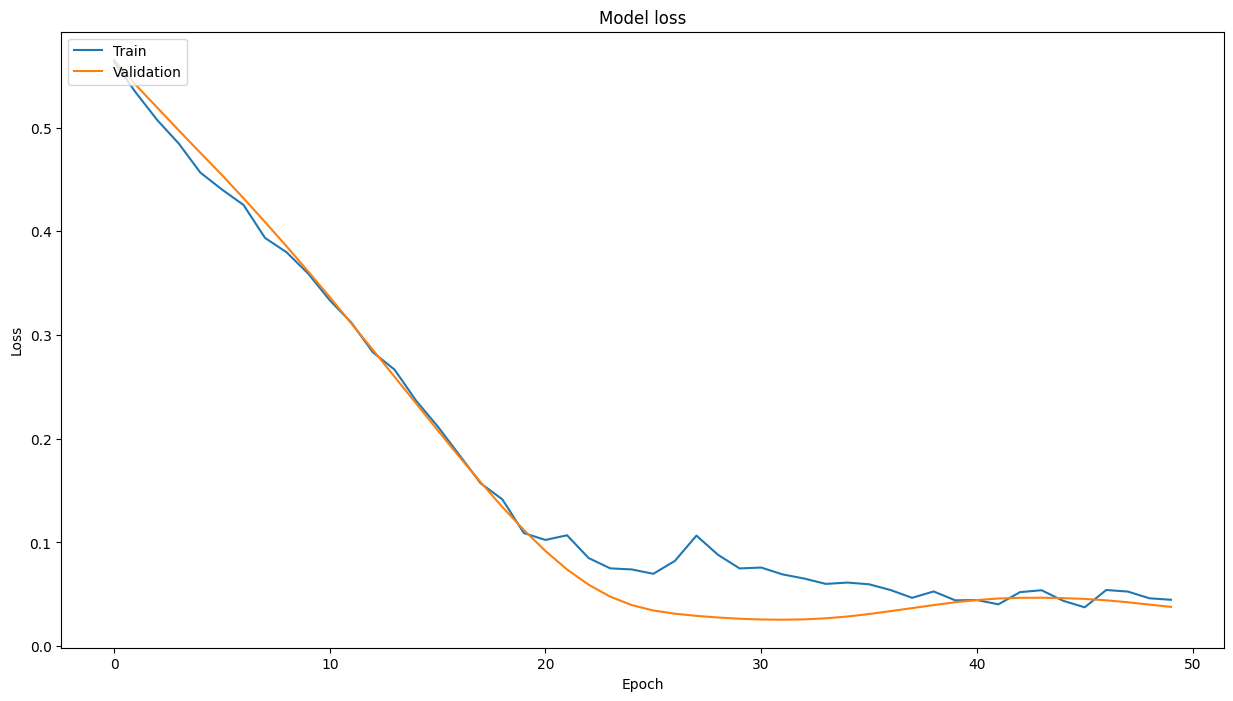

In [ ]:
# Train the model
history = model.fit([X['user'], X['book']], y, batch_size=64, epochs=50, validation_split=0.1)

# Plot training & validation loss values
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Predict the ratings
y_pred = model.predict([test_x['user'], test_x['book']])

# Rescale the predictions back to the 1 - 5 range
y_pred = y_pred * 4 + 1

# see predictions
print("Predictions:")
display(y_pred)

# save
pd.DataFrame(y_pred).to_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_y_pred.csv")

1/1 [==============================] - 0s 167ms/step
Predictions:


array([[4.1393805],
       [2.4230828],
       [2.4972453],
       [1.6612036],
       [2.4073176],
       [2.1226764],
       [1.9409723],
       [3.242445 ],
       [3.7316537],
       [4.0426974],
       [3.5080423],
       [3.9258206],
       [3.6982021],
       [2.6096811],
       [2.9007297],
       [2.9094064],
       [4.2280955],
       [3.4573026],
       [3.1991434],
       [2.9439116],
       [3.015808 ],
       [2.9595542],
       [3.5647516],
       [2.6196575]], dtype=float32)

In [ ]:
# set predictions and actual ratings to variables
hidden_ratings_array = (np.array(test_y)*4 + 1)
predicted_ratings_array = np.array(y_pred).flatten()

# see
print("Hidden Ratings:")
display(hidden_ratings_array)

print("Predicted Ratings:")
display(predicted_ratings_array)

Hidden Ratings:


array([4., 3., 4., 5., 5., 5., 5., 3., 2., 5., 4., 4., 5., 3., 2., 3., 4.,
       2., 3., 2., 3., 4., 5., 3.])

Predicted Ratings:


array([4.1393805, 2.4230828, 2.4972453, 1.6612036, 2.4073176, 2.1226764,
       1.9409723, 3.242445 , 3.7316537, 4.0426974, 3.5080423, 3.9258206,
       3.6982021, 2.6096811, 2.9007297, 2.9094064, 4.2280955, 3.4573026,
       3.1991434, 2.9439116, 3.015808 , 2.9595542, 3.5647516, 2.6196575],
      dtype=float32)

In [ ]:
# calculate MAE, MSE and RMSE (take the hidden ratings as the true values and the predicted ratings as the predicted values) ==========================================================================

from sklearn.metrics import mean_absolute_error, mean_squared_error

# calculate MAE, MSE and RMSE
print("Using sklearn")
mae = mean_absolute_error(hidden_ratings_array, predicted_ratings_array)
mse = mean_squared_error(hidden_ratings_array, predicted_ratings_array)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Manually
print("\n\nManually")
mae = np.mean(np.abs(hidden_ratings_array - predicted_ratings_array)) # Calculate Mean Absolute Error (MAE)
mse = np.mean((hidden_ratings_array - predicted_ratings_array) ** 2) # Calculate Mean Squared Error (MSE)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error (RMSE)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Using sklearn
Mean Absolute Error (MAE): 1.0820066034793854
Mean Squared Error (MSE): 2.141600107994963
Root Mean Squared Error (RMSE): 1.4634206872922644


Manually
Mean Absolute Error (MAE): 1.0820066034793854
Mean Squared Error (MSE): 2.141600107994963
Root Mean Squared Error (RMSE): 1.4634206872922644


In [ ]:
# step 4: calculate Classification Metrics (take the hidden ratings and the predicted ratings and binarise them) ==========================================================================

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
print(f"If predicted rating is greater than or equal to {threshold}, then 1, else 0\n")
print("Predicted Ratings:", predicted_ratings_array)
print("Binary Predictions:", binary_prediction_ratings)
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)
print("\n")

print("Hidden Ratings:", hidden_ratings_array)
print("Binary Hidden Ratings:", binary_hidden_ratings)

If predicted rating is greater than or equal to 3.5, then 1, else 0

Predicted Ratings: [4.1393805 2.4230828 2.4972453 1.6612036 2.4073176 2.1226764 1.9409723
 3.242445  3.7316537 4.0426974 3.5080423 3.9258206 3.6982021 2.6096811
 2.9007297 2.9094064 4.2280955 3.4573026 3.1991434 2.9439116 3.015808
 2.9595542 3.5647516 2.6196575]
Binary Predictions: [1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0]


Hidden Ratings: [4. 3. 4. 5. 5. 5. 5. 3. 2. 5. 4. 4. 5. 3. 2. 3. 4. 2. 3. 2. 3. 4. 5. 3.]
Binary Hidden Ratings: [1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0]


In [ ]:
# calculate accuracy using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy using sklearn
print("Using sklearn")
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate accuracy manually
print("\n\nManually")
true_positives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 1))
true_negatives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 0))
false_positives = np.sum((binary_hidden_ratings == 0) & (binary_prediction_ratings == 1))
false_negatives = np.sum((binary_hidden_ratings == 1) & (binary_prediction_ratings == 0))

accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Using sklearn
Accuracy: 0.7083333333333334
Precision: 0.875
Recall: 0.5384615384615384
F1 Score: 0.6666666666666667


Manually
Accuracy: 0.7083333333333334
Precision: 0.875
Recall: 0.5384615384615384
F1 Score: 0.6666666666666667


### Hyperparameter Tuning

Experimenting with different parameters and visualizing the training process can provide valuable insights into how well our model is performing and where improvements can be made.

- ***Plot Training and Validation Loss:*** This can help you understand if your model is overfitting or underfitting. If your training loss is much lower than your validation loss, your model might be overfitting. If both losses are high, your model might be underfitting.

- ***Experiment with Different Architectures:*** Try adding more layers to your model or increasing the number of neurons in each layer. You could also experiment with different types of layers (e.g., convolutional layers, recurrent layers) and different activation functions.

- ***Tune Hyperparameters***: This includes the learning rate, batch size, number of epochs, and regularization parameters. You could use techniques like grid search or random search to systematically explore different combinations of hyperparameters.

- ***Use Early Stopping:*** This technique allows you to stop training once the model’s performance on a validation set stops improving, which can be useful to prevent overfitting.

- ***Try Different Optimization Algorithms:*** In addition to Adam, there are many other optimization algorithms available in TensorFlow, such as SGD, RMSprop, and Adagrad. Different optimizers might lead to different results.

- ***Regularization:*** If your model is overfitting, you might want to add some form of regularization, such as L1 or L2 regularization, or dropout.

- ***Data Augmentation***: If you have a small dataset, you could artificially increase its size by creating modified versions of your existing data. For example, you could add small amounts of noise to your input data.

- ***Learning Rate Scheduling:*** Instead of using a fixed learning rate, you could decrease it over time or in response to the model’s performance.


In [ ]:
# reset space
%reset -f

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# tensorflow libraries
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
# DATA LOADING ====================================

# get original data
data = pd.read_csv(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\temp_data.csv", index_col=0)

# create a copy of the original matrix to store hidden ratings
data_hidden = data.copy()

# identifies rated books and randomly selects 2 books to hide ratings for each user
np.random.seed(10)  # You can use any integer value as the seed
for user_id in range(data_hidden.shape[0]):
    rated_books = np.where(data_hidden.iloc[user_id, :] > 0)[0]
    hidden_indices = np.random.choice(rated_books, min(2, len(rated_books)), replace=False)
    data_hidden.iloc[user_id, hidden_indices] = 'Hidden'

# get indices of hidden ratings
test_data = data_hidden.copy()
test_data = test_data.reset_index()
test_data = test_data.melt(id_vars=test_data.columns[0], var_name='book', value_name='rating')
test_data.columns = ['user', 'book', 'rating']
indices_hidden = test_data[test_data['rating'] == 'Hidden'].index

# Melt the DataFrame into a format where each row is a user-item interaction
data_hidden = data_hidden.reset_index()
data_hidden = data_hidden.melt(id_vars=data_hidden.columns[0], var_name='book', value_name='rating')

# change rows with hidden ratings to 0
data_hidden.iloc[indices_hidden, 2] = 0

# rename columns
data_hidden.columns = ['user', 'book', 'rating']

# Filter out the rows where rating is 0
data_hidden = data_hidden[data_hidden['rating'] != 0]

# Convert user and book to categorical
data_hidden['user'] = data_hidden['user'].astype('category')
data_hidden['book'] = data_hidden['book'].astype('category')


In [ ]:
# TEST AND TRAIN DATA ====================================

# Prepare the data - trining
train_x = data_hidden[['user', 'book']].apply(lambda x: x.cat.codes)
train_y = data_hidden['rating'].astype(np.float64)
train_y = (train_y - 1) / 4

# Prepare the data - testing
copy = data.copy()
copy = copy.reset_index()
copy = copy.melt(id_vars=copy.columns[0], var_name='book', value_name='rating')
copy.columns = ['user', 'book', 'rating']
test_x = copy.iloc[indices_hidden, 0:2]
test_x['user'] = test_x['user'].astype('category')
test_x['book'] = test_x['book'].astype('category')
test_x = test_x.apply(lambda x: x.cat.codes)
test_y = copy.iloc[indices_hidden, 2].astype(np.float64)
test_y = (test_y - 1) / 4

In [ ]:
# Function to train a neural network model for collaborative filtering
def train_model(n_layers, n_nodes, optimizer, epochs, learning_rate, batch_size, train_x, train_y, seed=10, train_plot=True):
    """
    Function to train a neural network model for collaborative filtering.
    :param n_layers: Number of dense layers in the model
    :param n_nodes: Number of nodes in each dense layer
    :param optimizer: Optimizer to use for training
    :param epochs: Number of epochs to train for
    :param learning_rate: Learning rate for the optimizer
    :param train_x: Training data
    :param train_y: Training labels
    :param seed: Random seed
    :return: Trained model and training history
    """
    # Set random seed
    np.random.seed(seed)

    # Create user and book embedding layers
    user_input = Input(shape=(1,), dtype='int32', name='user_input')
    book_input = Input(shape=(1,), dtype='int32', name='book_input')

    user_embedding = Embedding(input_dim=len(data_hidden['user'].cat.categories), output_dim=50, name='user_embedding')(user_input)
    book_embedding = Embedding(input_dim=len(data_hidden['book'].cat.categories), output_dim=50, name='book_embedding')(book_input)

    # Flatten the embedding vectors
    user_vecs = Flatten()(user_embedding)
    book_vecs = Flatten()(book_embedding)

    # Concatenate the embedding vectors
    input_vecs = Concatenate()([user_vecs, book_vecs])

    # Add dense layers
    x = input_vecs
    for i in range(n_layers):
        if i == 0:
            x = Dense(n_nodes, activation='relu')(x)
            x = Dropout(0.2)(x)
        else:
            n_nodes = n_nodes/2
            x = Dense(n_nodes, activation='relu')(x)
            x = Dropout(0.2)(x)
    y = Dense(1)(x)

    # Compile the model
    model = Model(inputs=[user_input, book_input], outputs=y)
    if optimizer == 'adam':
        opt = Adam(learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate)
    model.compile(optimizer=opt, loss='mse')

    # Train the model
    history = model.fit([train_x['user'], train_x['book']], train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    if train_plot:
        # Plot training & validation loss values
        plt.figure(figsize=(15, 8))
        plt.plot(history.history['loss'], label='Training Loss', marker='o')
        plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
        plt.title(f'Model loss for Architecture: {optimizer} optimizer, {n_layers} layers, {n_nodes} nodes, {epochs} epochs, {learning_rate} learning rate, {batch_size} batch size')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.savefig(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\ncf_training.png")
        plt.show()
    
    return model, history

In [ ]:
# Train the model
model, history = train_model(n_layers=2, n_nodes=256, optimizer='adam', epochs=100, learning_rate=0.001, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 2 - 3 layers, 256 nodes, adam, 100 epochs, 0.001 learning rate, 64 batch size
model2, history2 = train_model(n_layers=3, n_nodes=256, optimizer='adam', epochs=100, learning_rate=0.001, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 3 - 2 layers, 256 nodes, sgd, 100 epochs, 0.001 learning rate, 64 batch size
model3, history3 = train_model(n_layers=2, n_nodes=256, optimizer='sgd', epochs=100, learning_rate=0.001, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 4 - 3 layers, 256 nodes, sgd, 100 epochs, 0.001 learning rate, 64 batch size
model4, history4 = train_model(n_layers=3, n_nodes=256, optimizer='sgd', epochs=100, learning_rate=0.001, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 5 - 2 layers, 256 nodes, rmsprop, 100 epochs, 0.001 learning rate, 64 batch size
model5, history5 = train_model(n_layers=2, n_nodes=256, optimizer='rmsprop', epochs=100, learning_rate=0.001, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 6 - 3 layers, 256 nodes, rmsprop, 100 epochs, 0.001 learning rate, 64 batch size
model6, history6 = train_model(n_layers=3, n_nodes=256, optimizer='rmsprop', epochs=100, learning_rate=0.001, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 7 - 2 layers, 256 nodes, adam, 100 epochs, 0.01 learning rate, 64 batch size
model7, history7 = train_model(n_layers=2, n_nodes=256, optimizer='adam', epochs=100, learning_rate=0.01, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)

# Model 8 - 3 layers, 256 nodes, adam, 100 epochs, 0.01 learning rate, 64 batch size
model8, history8 = train_model(n_layers=3, n_nodes=256, optimizer='adam', epochs=100, learning_rate=0.01, batch_size=64, train_x=train_x, train_y=train_y, seed=10, train_plot=False)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.5390 - val_loss: 0.5478
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 0.4867 - val_loss: 0.4995
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 0.4444 - val_loss: 0.4531
Epoch 4/100
1/1 [==============================] - 0s 46ms/step - loss: 0.4011 - val_loss: 0.4081
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 0.3565 - val_loss: 0.3636
Epoch 6/100
1/1 [==============================] - 0s 51ms/step - loss: 0.3172 - val_loss: 0.3195
Epoch 7/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2746 - val_loss: 0.2763
Epoch 8/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2299 - val_loss: 0.2332
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 0.1803 - val_loss: 0.1912
Epoch 10/100
1/1 [==============================] - 0s 49ms/step - loss: 0.1490 - val_loss: 0.1517
Epoch 11/100
1/1 [===

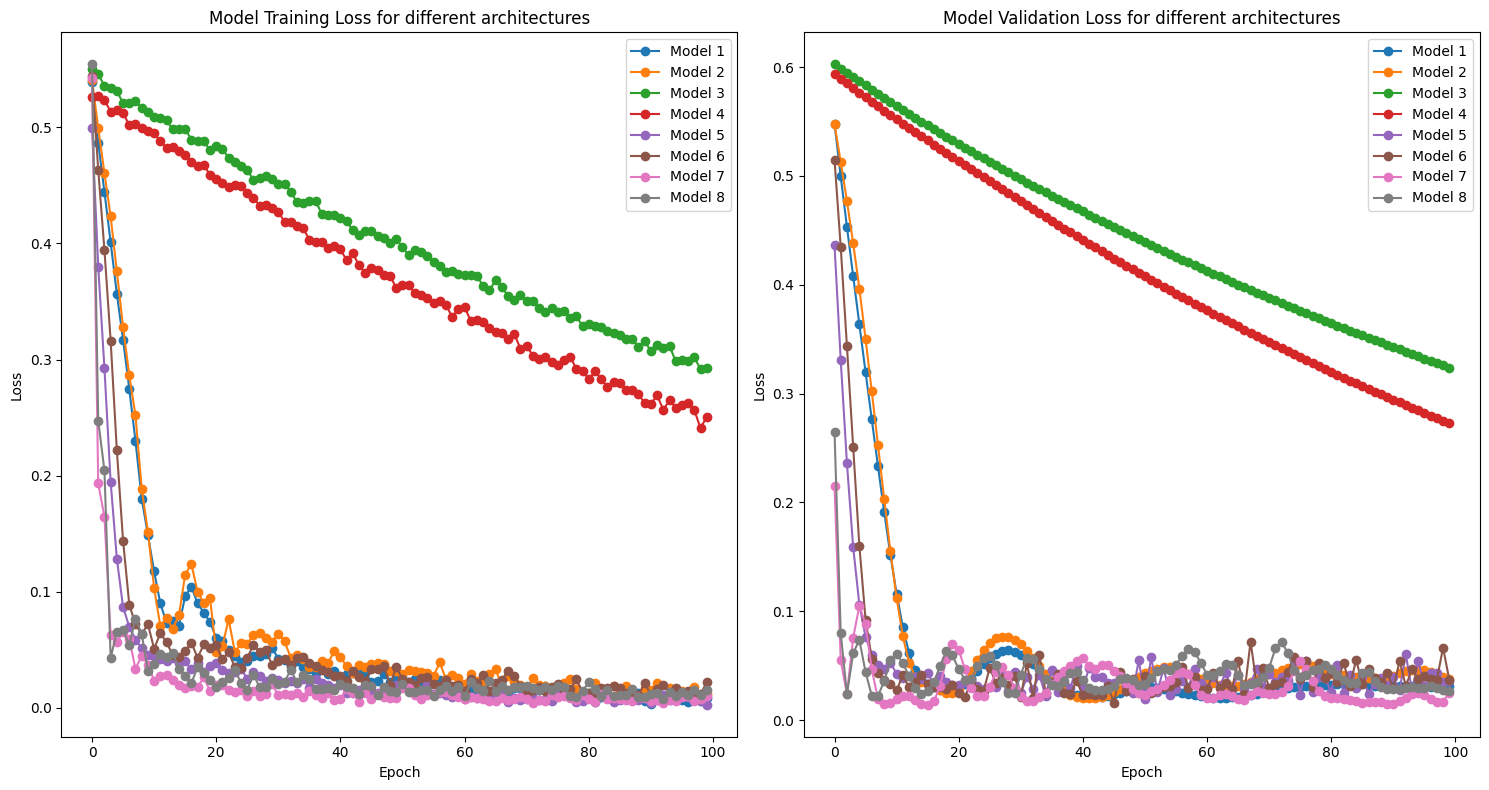

Model 1: 2 layers, 256 nodes, adam, 100 epochs, 0.001 learning rate, 64 batch size
Model 2: 3 layers, 256 nodes, adam, 100 epochs, 0.001 learning rate, 64 batch size
Model 3: 2 layers, 256 nodes, sgd, 100 epochs, 0.01 learning rate, 64 batch size
Model 4: 3 layers, 256 nodes, sgd, 100 epochs, 0.01 learning rate, 64 batch size
Model 5: 2 layers, 256 nodes, rmsprop, 100 epochs, 0.001 learning rate, 64 batch size
Model 6: 3 layers, 256 nodes, rmsprop, 100 epochs, 0.001 learning rate, 64 batch size
Model 7: 2 layers, 256 nodes, adam, 100 epochs, 0.01 learning rate, 64 batch size
Model 8: 3 layers, 256 nodes, adam, 100 epochs, 0.01 learning rate, 64 batch size


In [ ]:
# visualise training and validation loss for all models
plt.figure(figsize=(15, 8))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Model 1', marker='o')
plt.plot(history2.history['loss'], label='Model 2', marker='o')
plt.plot(history3.history['loss'], label='Model 3', marker='o')
plt.plot(history4.history['loss'], label='Model 4', marker='o')
plt.plot(history5.history['loss'], label='Model 5', marker='o')
plt.plot(history6.history['loss'], label='Model 6', marker='o')
plt.plot(history7.history['loss'], label='Model 7', marker='o')
plt.plot(history8.history['loss'], label='Model 8', marker='o')
plt.title('Model Training Loss for different architectures')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Model 1', marker='o')
plt.plot(history2.history['val_loss'], label='Model 2', marker='o')
plt.plot(history3.history['val_loss'], label='Model 3', marker='o')
plt.plot(history4.history['val_loss'], label='Model 4', marker='o')
plt.plot(history5.history['val_loss'], label='Model 5', marker='o')
plt.plot(history6.history['val_loss'], label='Model 6', marker='o')
plt.plot(history7.history['val_loss'], label='Model 7', marker='o')
plt.plot(history8.history['val_loss'], label='Model 8', marker='o')
plt.title('Model Validation Loss for different architectures')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(r"C:\Users\e1002902\Documents\GitHub Repository\Masters-Dissertation\Code\ncf_training_all.png")
plt.show()

# print models
print("Model 1: 2 layers, 256 nodes, adam, 100 epochs, 0.001 learning rate, 64 batch size")
print("Model 2: 3 layers, 256 nodes, adam, 100 epochs, 0.001 learning rate, 64 batch size")
print("Model 3: 2 layers, 256 nodes, sgd, 100 epochs, 0.001 learning rate, 64 batch size")
print("Model 4: 3 layers, 256 nodes, sgd, 100 epochs, 0.001 learning rate, 64 batch size")
print("Model 5: 2 layers, 256 nodes, rmsprop, 100 epochs, 0.001 learning rate, 64 batch size")
print("Model 6: 3 layers, 256 nodes, rmsprop, 100 epochs, 0.001 learning rate, 64 batch size")
print("Model 7: 2 layers, 256 nodes, adam, 100 epochs, 0.01 learning rate, 64 batch size")
print("Model 8: 3 layers, 256 nodes, adam, 100 epochs, 0.01 learning rate, 64 batch size")


In [ ]:
# MODEL EVALUATION ====================================
# Predict the ratings
y_pred = model.predict([test_x['user'], test_x['book']])

# Rescale the predictions back to the 1-5 range
y_pred = y_pred * 4 + 1

# set predictions and actual ratings to variables
hidden_ratings_array = (np.array(test_y)*4 + 1)
predicted_ratings_array = np.array(y_pred).flatten()

# Rating predictions
mae = mean_absolute_error(hidden_ratings_array, predicted_ratings_array)
mse = mean_squared_error(hidden_ratings_array, predicted_ratings_array)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Binarise the hidden ratings and predicted ratings
threshold = 3.5
binary_prediction_ratings = (predicted_ratings_array >= threshold).astype(int) 
binary_hidden_ratings = (hidden_ratings_array >= threshold).astype(int)

# Classification predictions
accuracy = accuracy_score(binary_hidden_ratings, binary_prediction_ratings)
precision = precision_score(binary_hidden_ratings, binary_prediction_ratings)
recall = recall_score(binary_hidden_ratings, binary_prediction_ratings)
f1 = f1_score(binary_hidden_ratings, binary_prediction_ratings)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Extra

Querying ChatGPT

I am doing a project on building a neural collaborative filtering recommender system using amazon product review data. I want the recommender system to use the user ratings for items and the user review text. I have the following function for NCF using ratings and review text:
def train_model(n_layers, n_nodes, optimizer, epochs, learning_rate, batch_size, train_x, train_y, review_text_embeddings, seed=2207):
    np.random.seed(seed)
    user_input = Input(shape=(1,), dtype='int32', name='user_input')
    product_input = Input(shape=(1,), dtype='int32', name='product_input')
    text_input = Input(shape=(text_embedding_dim,), dtype='float32', name='text_input')  # Text embeddings

    user_embedding = Embedding(input_dim=len(data_hidden['user'].cat.categories), output_dim=50, name='user_embedding')(user_input)
    product_embedding = Embedding(input_dim=len(data_hidden['product'].cat.categories), output_dim=50, name='product_embedding')(product_input)

    user_vecs = Flatten()(user_embedding)
    product_vecs = Flatten()(product_embedding)

    input_vecs = Concatenate()([user_vecs, product_vecs, text_input])

    x = input_vecs
    for i in range(n_layers):
        if i == 0:
            x = Dense(n_nodes, activation='relu')(x)
            x = Dropout(0.2)(x)
        else:
            n_nodes = n_nodes/2
            x = Dense(n_nodes, activation='relu')(x)
            x = Dropout(0.2)(x)
    y = Dense(1)(x)

    model = Model(inputs=[user_input, product_input, text_input], outputs=y)
    # ...
    if optimizer == 'adam':
        opt = Adam(learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate)
    model.compile(optimizer=opt, loss='mse')

    history = model.fit([train_x['user'], train_x['product']], train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    
    return model, history

How does it look?

Now this is the code I have done for preprocessing the ratings that each user has given for each item: x_hidden = data.copy()
indices_tracker = []
N = 3
np.random.seed(2207) 
for user_id in range(x_hidden.shape[0]):
    rated_products = np.where(x_hidden.iloc[user_id, :] > 0)[0]
    # print("User:", user_id)
    # print("Indices of Rated Products:", rated_products)
    hidden_indices = np.random.choice(rated_products, N, replace=False)
    indices_tracker.append(hidden_indices)
    # print("Indices to Hide:", hidden_indices, "\n")
    x_hidden.iloc[user_id, hidden_indices] = 'Hidden'

test_data = x_hidden.copy()
test_data = test_data.reset_index()
test_data = test_data.melt(id_vars=test_data.columns[0], var_name='book', value_name='rating')
test_data.columns = ['user', 'product', 'rating']
indices_hidden = test_data[test_data['rating'] == 'Hidden'].index

data_hidden = x_hidden.reset_index()
data_hidden = data_hidden.melt(id_vars=data_hidden.columns[0], var_name='product', value_name='rating')
data_hidden.iloc[indices_hidden, 2] = np.nan
data_hidden.columns = ['user', 'product', 'rating']
data_hidden = data_hidden[data_hidden['rating'].notna()]
data_hidden['user'] = data_hidden['user'].astype('category')
data_hidden['product'] = data_hidden['product'].astype('category')

train_x = data_hidden[['user', 'product']].apply(lambda x: x.cat.codes)
train_y = data_hidden['rating'].astype(np.float64)
train_y = (train_y - 1) / 4

copy = x.copy()
copy = copy.reset_index()
copy = copy.melt(id_vars=copy.columns[0], var_name='product', value_name='rating')
copy.columns = ['user', 'product', 'rating']
test_x = copy.iloc[indices_hidden, 0:2]
test_x['user'] = test_x['user'].astype('category')
test_x['product'] = test_x['product'].astype('category')
test_x = test_x.apply(lambda x: x.cat.codes)
test_y = copy.iloc[indices_hidden, 2].astype(np.float64)
test_y = (test_y - 1) / 4

How can i adjust this code to also include and preprocess my review text data which is stored in 'data'.